In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:07<00:00, 20.2MB/s]
100% 715M/715M [00:07<00:00, 105MB/s] 


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset has been extracted")

The dataset has been extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.0 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')
print(f"{type(filenames) = }")
print(f"{len(filenames) = }")

type(filenames) = <class 'list'>
len(filenames) = 50000


In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['20285.png', '31475.png', '24353.png', '26860.png', '21014.png']
['82.png', '1967.png', '29654.png', '29513.png', '40584.png']


In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')
print(f"{labels_df.shape = }")
labels_df.head()

labels_df.shape = (50000, 2)


,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird': 2, 'cat':3, 'deer': 4, 'dog':5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
labels = [labels_dictionary[i] for i in labels_df['label']]

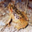

In [ ]:
#displaying a sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [ ]:
id_list = list(labels_df['id'])
id_list[0:5]

[1, 2, 3, 4, 5]

In [ ]:
#Convert images to numpy arrays
train_data_folder = '/content/train/'
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
#convert image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(f"{X.shape = }")
print(f"{Y.shape = }")

X.shape = (50000, 32, 32, 3)
Y.shape = (50000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(f"{X_train.shape = }")
print(f"{y_train.shape = }")

print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (40000, 32, 32, 3)
y_train.shape = (40000,)
X_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000,)


In [ ]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes  = 10

##setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
])

In [ ]:
#compile the neural network
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 5ms/step - loss: 1.9260 - acc: 0.3011 - val_loss: 1.8192 - val_acc: 0.3485
Epoch 2/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7370 - acc: 0.3761 - val_loss: 1.7682 - val_acc: 0.3638
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6704 - acc: 0.3997 - val_loss: 1.6926 - val_acc: 0.3910
Epoch 4/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.6257 - acc: 0.4152 - val_loss: 1.6333 - val_acc: 0.4027
Epoch 5/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.5886 - acc: 0.4305 - val_loss: 1.5977 - val_acc: 0.4285
Epoch 6/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.5629 - acc: 0.4391 - val_loss: 1.6584 - val_acc: 0.4035
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.5471 - acc: 0.4457 - val_loss: 1.6006 - val_acc: 0.4290
Epoch 8/10
1125/1125 [==============================] - 6s 5ms

In [ ]:
from tensorflow.keras import Sequential, models, layers, optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
# adding our own layers in the model
num_of_classes = 10

model = models.Sequential() # within the sequential layer we will stack all the layers
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 488s 398ms/step - loss: 1.6779 - acc: 0.4436 - val_loss: 0.8964 - val_acc: 0.7648
Epoch 2/10
1125/1125 [==============================] - 445s 396ms/step - loss: 1.0259 - acc: 0.7039 - val_loss: 0.5512 - val_acc: 0.8748
Epoch 3/10
1125/1125 [==============================] - 452s 401ms/step - loss: 0.7528 - acc: 0.8105 - val_loss: 0.4184 - val_acc: 0.9122
Epoch 4/10
1125/1125 [==============================] - 452s 402ms/step - loss: 0.5777 - acc: 0.8694 - val_loss: 0.3184 - val_acc: 0.9283
Epoch 5/10
1125/1125 [==============================] - 452s 402ms/step - loss: 0.4519 - acc: 0.9102 - val_loss: 0.2626 - val_acc: 0.9355
Epoch 6/10
1125/1125 [==============================] - 453s 402ms/step - loss: 0.3515 - acc: 0.9357 - val_loss: 0.2552 - val_acc: 0.9355
Epoch 7/10
1125/1125 [==============================] - 452s 402ms/step - loss: 0.2879 - acc: 0.9517 - val_loss: 0.2391 - val_acc: 0.9398
Epoch 8/10
1125/1125 [============

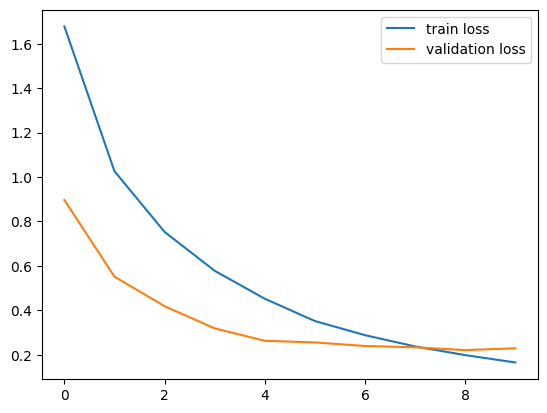

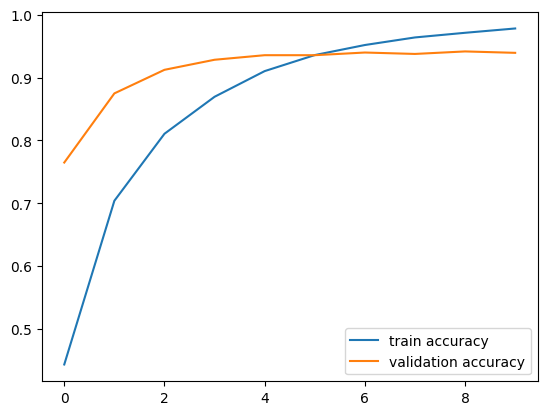

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()